# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [356]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [357]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [358]:
# What the dataset looks like?
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [359]:
# Number of rows and columns
websites.shape

(1781, 21)

In [360]:
# Get information about the data set
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [361]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [362]:
# Revisar la cantidad de valores nulos en cada columna
missing_values = websites.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64


In [363]:
# Describe the data
websites.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_LENGTH,1781.0,56.961258,27.555586,16.0,39.0,49.0,68.0,249.0
NUMBER_SPECIAL_CHARACTERS,1781.0,11.111735,4.549896,5.0,8.0,10.0,13.0,43.0
CONTENT_LENGTH,969.0,11726.927761,36391.809051,0.0,324.0,1853.0,11323.0,649263.0
TCP_CONVERSATION_EXCHANGE,1781.0,16.261089,40.500975,0.0,0.0,7.0,22.0,1194.0
DIST_REMOTE_TCP_PORT,1781.0,5.472768,21.807327,0.0,0.0,0.0,5.0,708.0
REMOTE_IPS,1781.0,3.060640,3.386975,0.0,0.0,2.0,5.0,17.0
APP_BYTES,1781.0,2982.339135,56050.574748,0.0,0.0,672.0,2328.0,2362906.0
SOURCE_APP_PACKETS,1781.0,18.540146,41.627173,0.0,0.0,8.0,26.0,1198.0
REMOTE_APP_PACKETS,1781.0,18.746210,46.397969,0.0,0.0,9.0,25.0,1284.0
SOURCE_APP_BYTES,1781.0,15892.545761,69861.929888,0.0,0.0,579.0,9806.0,2060012.0


In [364]:
# Deal with null values
# Drop content_length column (+50% null values)
web_clean = websites.drop("CONTENT_LENGTH",  axis='columns')

# Drop rows with null
web_clean = websites.dropna()

web_clean.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
11,B0_1102,20,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/11/2016 0:00,23/11/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
16,M0_97,21,7,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,...,0,2,603,8,9,1580,745,8,2.0,1


In [365]:
# Revisar la cantidad de valores nulos en cada columna
missing_values_clean = web_clean.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print("Valores faltantes por columna:")
print(missing_values_clean[missing_values_clean > 0])

Valores faltantes por columna:
Series([], dtype: int64)


In [366]:
web_encoded = web_clean.copy()

# Convert date columns to datetime
web_encoded['WHOIS_REGDATE'] = pd.to_datetime(web_encoded['WHOIS_REGDATE'], errors='coerce')
web_encoded['WHOIS_UPDATED_DATE'] = pd.to_datetime(web_encoded['WHOIS_UPDATED_DATE'], errors='coerce')

# Convert datetime columns to numeric (timestamps in nanoseconds)
web_encoded['WHOIS_REGDATE'] = web_encoded['WHOIS_REGDATE'].astype('int64')  # Numeric representation
web_encoded['WHOIS_UPDATED_DATE'] = web_encoded['WHOIS_UPDATED_DATE'].astype('int64')

In [367]:
# Which columns contain the features of the websites?
X = web_encoded.iloc[:, :-1].values  # All rows and all the columns except from the last one


In [368]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
y = web_encoded.iloc[:, -1].values   # All rows and just the last column

In [369]:
# 0 for bening 1 for maliciuos websites
print(web_encoded.iloc[:, -1].value_counts())

# Imbalanced data set 

Type
0    590
1     46
Name: count, dtype: int64


In [370]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each object column
for col in ["URL", "CHARSET", "SERVER", "WHOIS_COUNTRY", "WHOIS_STATEPRO"]:
    web_encoded[col] = LabelEncoder().fit_transform(web_encoded[col])

# Check dtypes
print(web_encoded.dtypes)


URL                            int64
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                        int64
SERVER                         int64
CONTENT_LENGTH               float64
WHOIS_COUNTRY                  int64
WHOIS_STATEPRO                 int64
WHOIS_REGDATE                  int64
WHOIS_UPDATED_DATE             int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [371]:
# Correlation
corr_matrix = web_encoded.corr()
corr_matrix

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,-0.076447,-0.046348,-0.089122,-0.012259,-0.042656,-0.028330,0.071050,-0.010081,-0.020163,...,0.048393,0.222326,0.110614,0.102894,0.093058,0.056194,0.124688,0.102894,0.359803,0.448651
URL_LENGTH,-0.076447,1.000000,0.939219,-0.023010,0.062221,0.083071,0.096012,0.011245,-0.055644,-0.063650,...,0.091091,0.071821,0.019983,0.025918,0.021964,0.012258,0.023281,0.025918,0.070535,-0.110873
NUMBER_SPECIAL_CHARACTERS,-0.046348,0.939219,1.000000,-0.032361,0.058784,0.089619,0.081279,0.013410,-0.065230,-0.048663,...,0.096494,0.069752,0.024361,0.026377,0.023032,0.009512,0.028663,0.026377,0.101123,-0.040360
CHARSET,-0.089122,-0.023010,-0.032361,1.000000,-0.019448,0.056775,-0.019095,0.028970,-0.003229,-0.153227,...,0.057879,-0.011056,-0.037237,-0.018476,-0.010428,0.004852,-0.038299,-0.018476,-0.027170,-0.166274
SERVER,-0.012259,0.062221,0.058784,-0.019448,1.000000,-0.044740,0.141001,0.021926,0.083052,0.073093,...,0.104415,0.038328,0.035758,0.022532,0.016560,0.008355,0.036061,0.022532,0.013385,-0.081736
CONTENT_LENGTH,-0.042656,0.083071,0.089619,0.056775,-0.044740,1.000000,-0.114339,0.012423,0.014223,-0.099893,...,0.007254,0.012033,0.040326,0.052218,0.059915,0.080526,0.039218,0.052218,-0.010717,-0.094134
WHOIS_COUNTRY,-0.028330,0.096012,0.081279,-0.019095,0.141001,-0.114339,1.000000,-0.229729,-0.155356,-0.085251,...,0.079511,0.041856,0.017250,-0.004045,-0.016066,-0.035517,0.020156,-0.004045,0.070334,0.019682
WHOIS_STATEPRO,0.071050,0.011245,0.013410,0.028970,0.021926,0.012423,-0.229729,1.000000,0.089628,-0.139765,...,-0.070322,-0.023713,-0.034776,-0.039752,-0.038663,-0.036171,-0.033033,-0.039752,0.033784,0.199506
WHOIS_REGDATE,-0.010081,-0.055644,-0.065230,-0.003229,0.083052,0.014223,-0.155356,0.089628,1.000000,0.259871,...,-0.016116,-0.005167,-0.034941,-0.028401,-0.016983,-0.010679,-0.035939,-0.028401,-0.032154,-0.004343
WHOIS_UPDATED_DATE,-0.020163,-0.063650,-0.048663,-0.153227,0.073093,-0.099893,-0.085251,-0.139765,0.259871,1.000000,...,0.055029,0.023835,0.039871,0.034763,0.034252,0.030689,0.038282,0.034763,-0.016873,-0.031364


In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

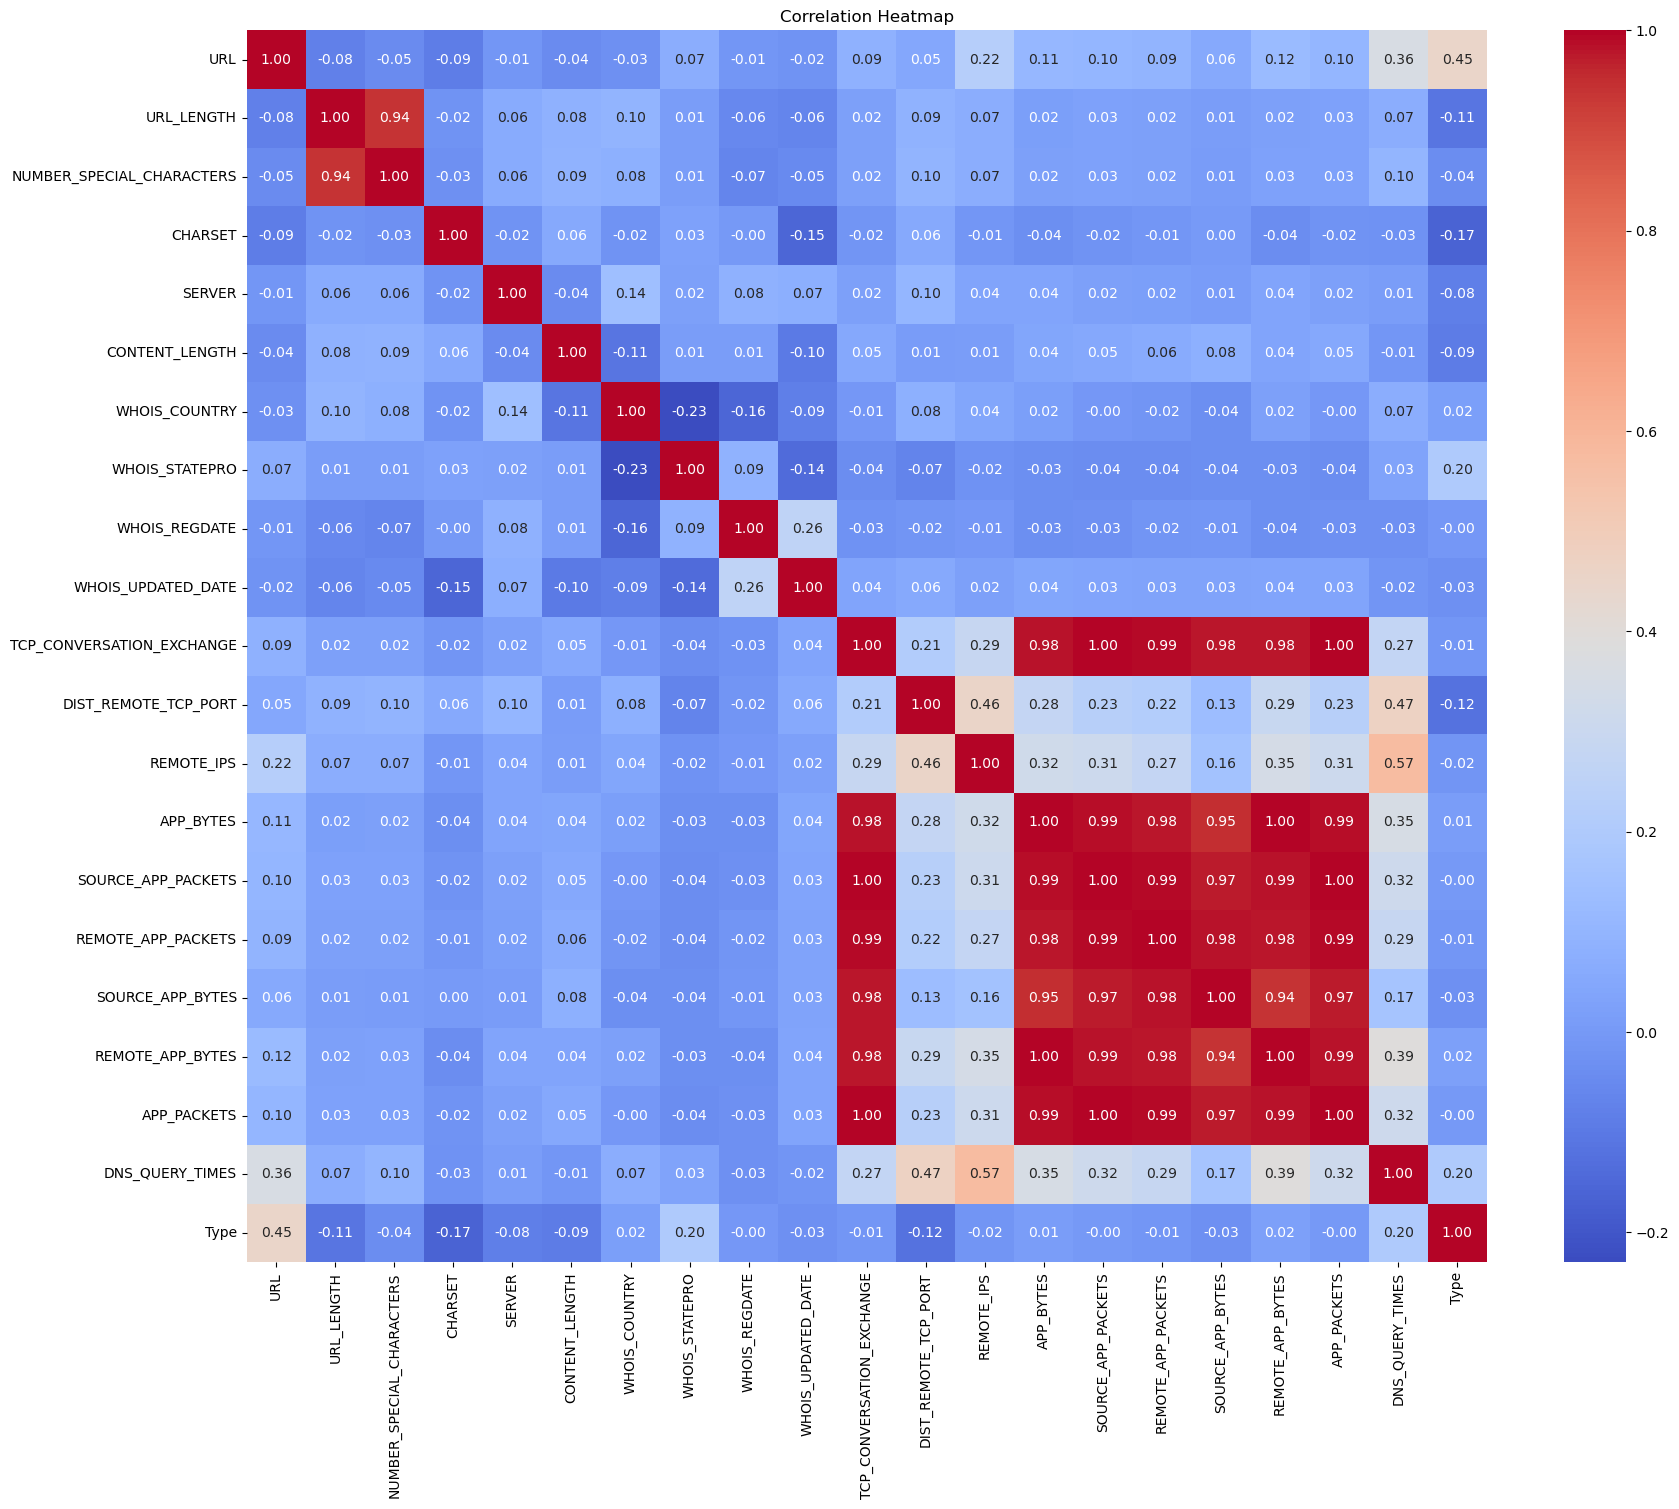

In [373]:
# Correlation heatmap

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Observations from the Heatmap:
Highly Collinear Columns:

- APP_BYTES, SOURCE_APP_BYTES, REMOTE_APP_BYTES, APP_PACKETS, SOURCE_APP_PACKETS, and REMOTE_APP_PACKETS exhibit very high correlations (near 1.0). These columns appear to represent related metrics, so retaining just one or a subset of these may suffice.
- NUMBER_SPECIAL_CHARACTERS and URL_LENGTH are also highly correlated (0.94). We might retain one of these.

Choose one among correlated groups:
- Between APP_BYTES, SOURCE_APP_BYTES, and REMOTE_APP_BYTES, keep only one.
- Similarly, reduce redundancy among APP_PACKETS, SOURCE_APP_PACKETS, and REMOTE_APP_PACKETS.

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [374]:
! pip install xgboost
from xgboost import XGBClassifier, XGBRegressor

In [375]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [376]:
xgb = XGBRegressor()
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [377]:
sort_idx = xgb.feature_importances_.argsort()

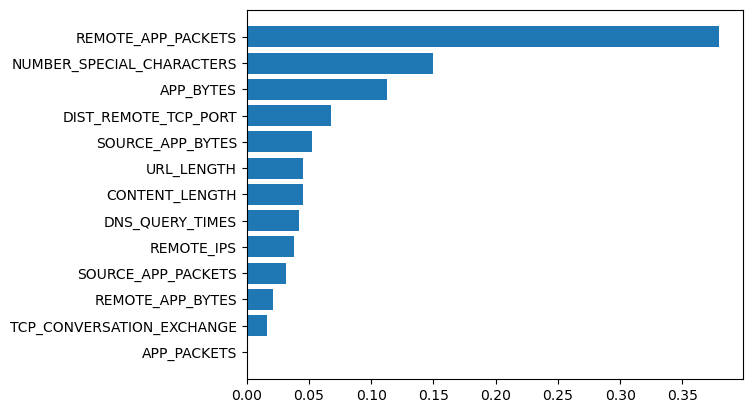

In [378]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [379]:
# Between APP_BYTES, SOURCE_APP_BYTES, and REMOTE_APP_BYTES, keep only one
# Reduce redundancy among APP_PACKETS, SOURCE_APP_PACKETS, and REMOTE_APP_PACKETS, TCP_CONVERSATION_EXCHANGE

# Drop APP_PACKETS - low weight based on xgb model
web_encoded = web_encoded.drop("APP_PACKETS",  axis='columns')

# Drop APP_PACKETS - low weight based on xgb model
web_encoded = web_encoded.drop("SOURCE_APP_PACKETS",  axis='columns')

# Drop TCP_CONVERSATION_EXCHANGE - low weight based on xgb model
web_encoded = web_encoded.drop("TCP_CONVERSATION_EXCHANGE",  axis='columns')

# Drop REMOTE_APP_BYTES - low weight based on xgb model
web_encoded = web_encoded.drop("REMOTE_APP_BYTES",  axis='columns')

# Drop SOURCE_APP_BYTES - low weight based on xgb model
web_encoded = web_encoded.drop("SOURCE_APP_BYTES",  axis='columns')

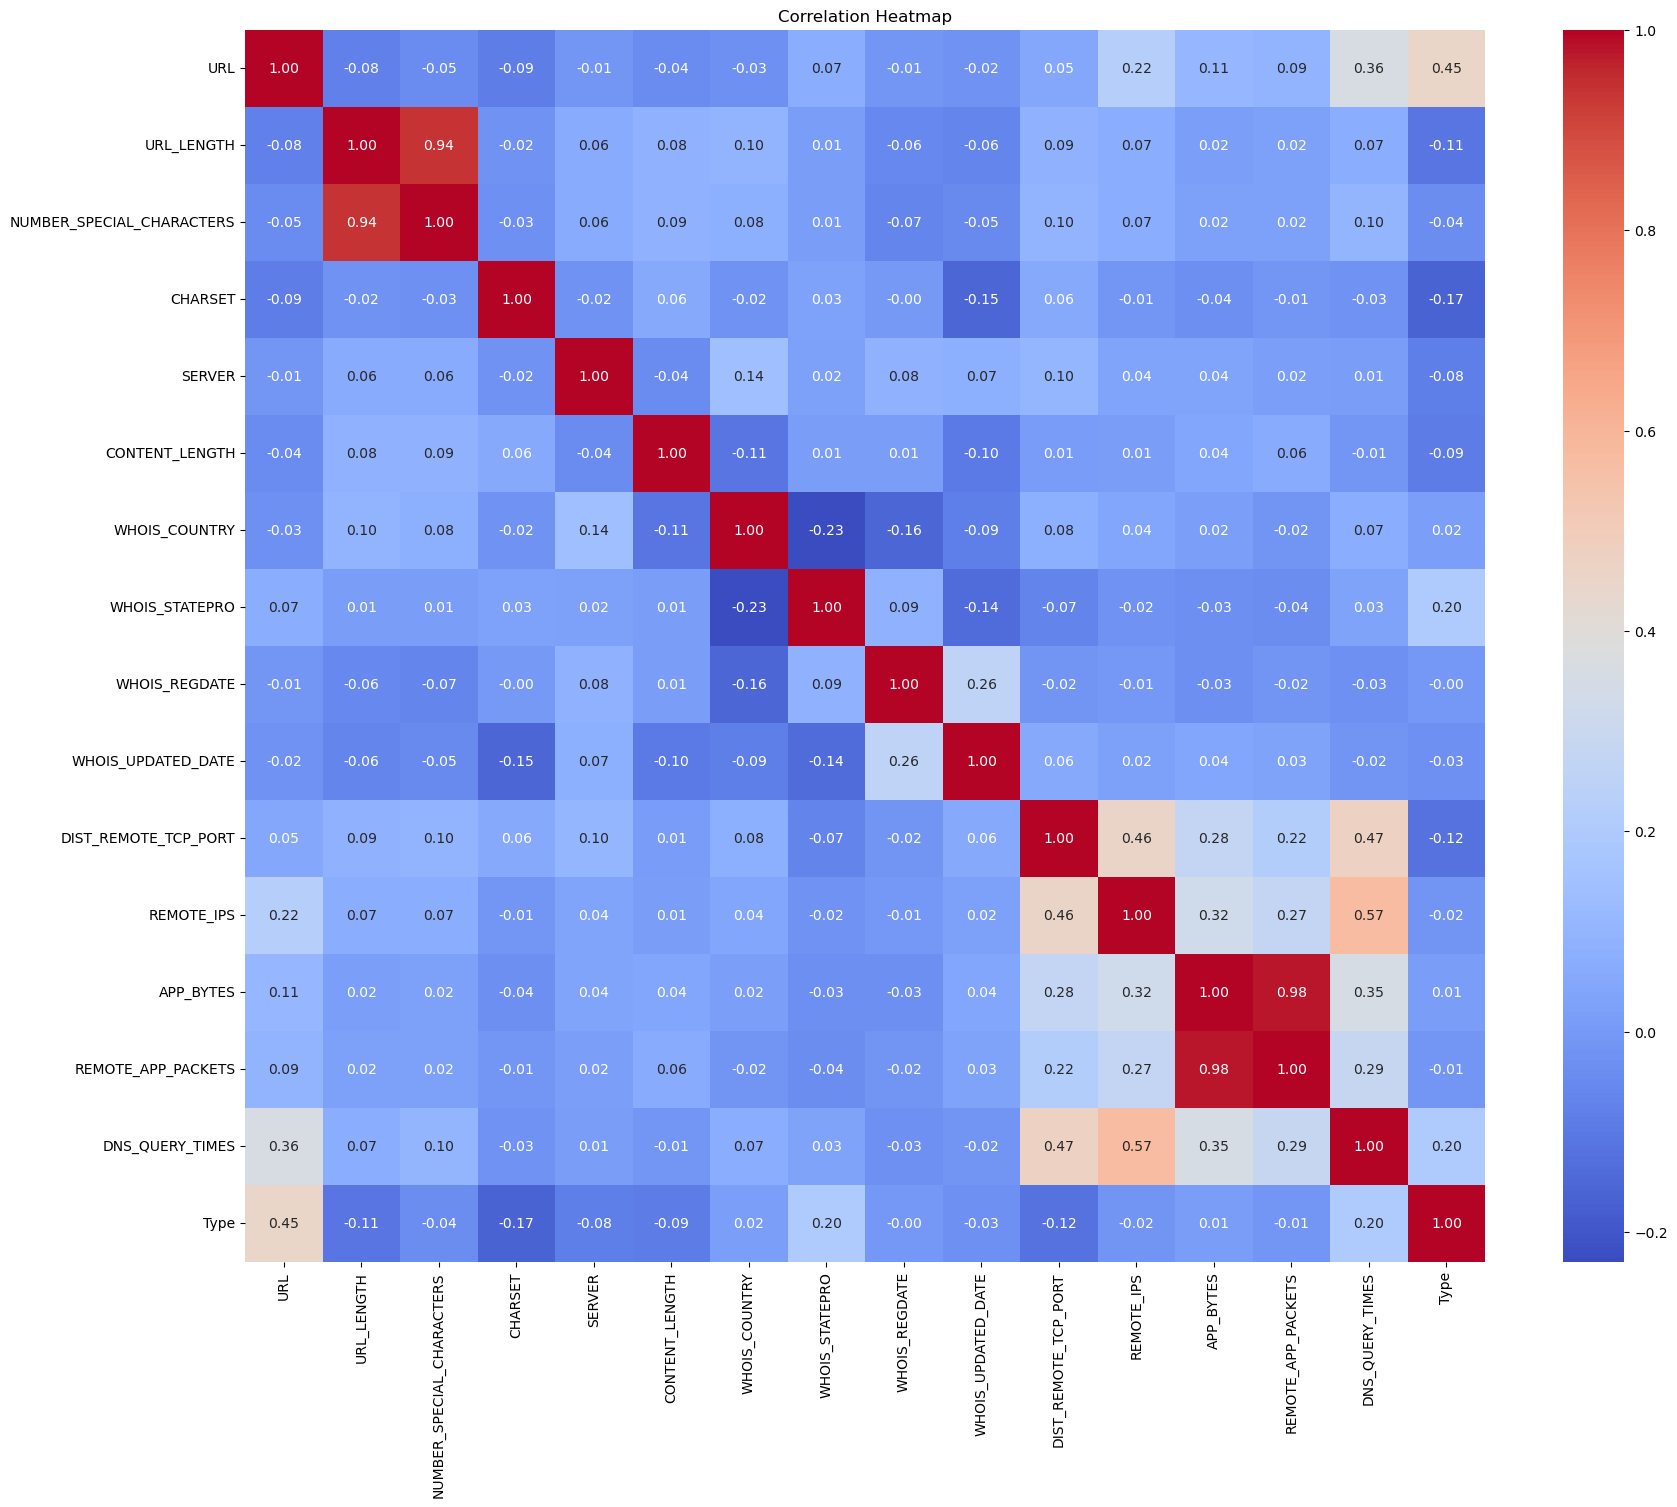

In [355]:
# Heatmap without colinearity variables

# Correlation
corr_matrix_clean = web_encoded.corr()

# Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_clean, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [327]:
# Firts we will drop the columns with more than 50% of missing data
# Already done for the web_clean dataframe before starting the model

In [328]:
# Now we will drop the rows with missing data
# Already done for the web_clean dataframe before starting the model

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [329]:
# Examine missing values in each column

# Revisar la cantidad de valores nulos en cada columna
missing_values_clean = web_clean.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print("Valores faltantes por columna:")
print(missing_values_clean[missing_values_clean > 0])

Valores faltantes por columna:
Series([], dtype: int64)


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [330]:
web_clean.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [331]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

web_clean.loc[:, 'WHOIS_COUNTRY'] = web_clean['WHOIS_COUNTRY'].apply(lambda x: good_country.get(x, x))





In [332]:
web_clean.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [333]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

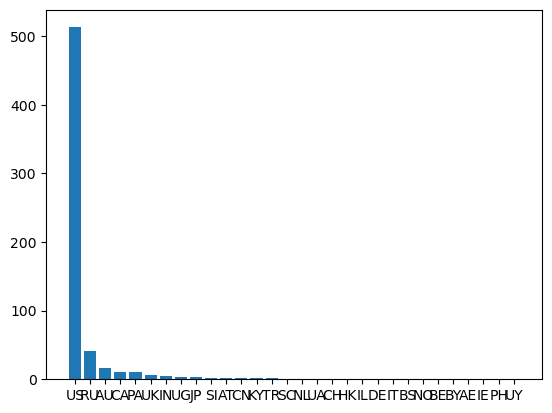

<Figure size 1500x1500 with 0 Axes>

In [334]:
print_bar_plot(web_clean.WHOIS_COUNTRY.unique(),web_clean.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [335]:
# Obtener los 10 primeros valores más frecuentes en la columna 'WHOIS_COUNTRY'
top_10_countries = web_clean['WHOIS_COUNTRY'].value_counts().head(10).index

# Reemplazar todos los demás valores por 'OTHER'
web_clean['WHOIS_COUNTRY'] = web_clean['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

/var/folders/ws/nnfflmsx4qs43903148tzjnc0000gn/T/ipykernel_10352/3253273658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_clean['WHOIS_COUNTRY'] = web_clean['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [336]:
web_clean = web_clean.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],  axis='columns')

web_clean

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
11,B0_1102,20,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
16,M0_97,21,7,iso-8859-1,nginx,686.0,OTHER,6,0,2,603,8,9,1580,745,8,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,B0_2233,143,22,ISO-8859-1,AkamaiGHost,374.0,US,6,5,2,564,6,7,442,564,6,0.0,0
1762,B0_221,146,24,UTF-8,nginx,11833.0,US,29,20,8,4167,33,33,3181,4499,33,4.0,0
1774,B0_156,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,22,2,7,2062,30,26,8161,2742,30,8.0,0
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,6631,87,89,132181,6945,87,4.0,0


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [337]:
web_clean.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [338]:
web_clean = web_clean.drop(["URL"],  axis='columns')

web_clean

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
6,18,6,iso-8859-1,Apache/2,345.0,US,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
11,20,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0,0,0,0,0.0,0
16,21,7,iso-8859-1,nginx,686.0,OTHER,6,0,2,603,8,9,1580,745,8,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,143,22,ISO-8859-1,AkamaiGHost,374.0,US,6,5,2,564,6,7,442,564,6,0.0,0
1762,146,24,UTF-8,nginx,11833.0,US,29,20,8,4167,33,33,3181,4499,33,4.0,0
1774,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,22,2,7,2062,30,26,8161,2742,30,8.0,0
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,6631,87,89,132181,6945,87,4.0,0


#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [339]:
web_clean.CHARSET.unique()

array(['ISO-8859-1', 'iso-8859-1', 'us-ascii', 'utf-8', 'UTF-8',
       'windows-1251'], dtype=object)

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [340]:
web_clean.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [341]:
# Definir una función para clasificar los tipos de servidor
def classify_server(server_value):
    if 'Microsoft' in server_value:
        return 'Microsoft'
    elif 'Apache' in server_value:
        return 'Apache'
    elif 'nginx' in server_value:
        return 'nginx'
    else:
        return 'Other'

# Aplicar la función a la columna 'SERVER'
web_clean['SERVER'] = web_clean['SERVER'].apply(classify_server)


In [342]:
# Count `SERVER` value counts here
web_clean.SERVER.unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [343]:
web_clean.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [346]:
# Transform object columns to numeric - Perform one-hot encoding on the object columns
web_dummy = pd.get_dummies(web_clean, columns=["CHARSET", "SERVER", "WHOIS_COUNTRY"])


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [347]:
web_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 3 to 1780
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 636 non-null    int64  
 1   NUMBER_SPECIAL_CHARACTERS  636 non-null    int64  
 2   CONTENT_LENGTH             636 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  636 non-null    int64  
 4   DIST_REMOTE_TCP_PORT       636 non-null    int64  
 5   REMOTE_IPS                 636 non-null    int64  
 6   APP_BYTES                  636 non-null    int64  
 7   SOURCE_APP_PACKETS         636 non-null    int64  
 8   REMOTE_APP_PACKETS         636 non-null    int64  
 9   SOURCE_APP_BYTES           636 non-null    int64  
 10  REMOTE_APP_BYTES           636 non-null    int64  
 11  APP_PACKETS                636 non-null    int64  
 12  DNS_QUERY_TIMES            636 non-null    float64
 13  Type                       636 non-null    int64  
 14

In [380]:
# Drop APP_PACKETS - low weight based on xgb model
web_dummy = web_dummy.drop("APP_PACKETS",  axis='columns')

# Drop APP_PACKETS - low weight based on xgb model
web_dummy = web_dummy.drop("SOURCE_APP_PACKETS",  axis='columns')

# Drop TCP_CONVERSATION_EXCHANGE - low weight based on xgb model
web_dummy = web_dummy.drop("TCP_CONVERSATION_EXCHANGE",  axis='columns')

# Drop REMOTE_APP_BYTES - low weight based on xgb model
web_dummy = web_dummy.drop("REMOTE_APP_BYTES",  axis='columns')

# Drop SOURCE_APP_BYTES - low weight based on xgb model
web_dummy = web_dummy.drop("SOURCE_APP_BYTES",  axis='columns')

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [384]:
from sklearn.model_selection import train_test_split

# Define X and Y
X = web_dummy.iloc[:, :-1]  # All rows and all the columns except from the last one
y = web_dummy.iloc[:, -1].values

# Your code here:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(636, 29) (508, 29) (128, 29)
(636,) (508,) (128,)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [385]:
# Import Logsitic Regression
from sklearn.linear_model import LogisticRegression

# Create the Linear Regression estimator
conversion_model_logistic = LogisticRegression()

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [387]:
# Perform de fitting
conversion_model_logistic.fit(X_train,y_train)

# Print intercept
print("Intercept:", conversion_model_logistic.intercept_)

# Create a DataFrame to display feature names with their coefficients
coefficients_logistic = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': conversion_model_logistic.coef_[0]})

# Print the coefficients DataFrame
print(coefficients_logistic.sort_values(by="Coefficient", ascending=False))


Intercept: [0.11973002]
                      Feature  Coefficient
3        DIST_REMOTE_TCP_PORT     0.287353
17               SERVER_Other     0.268961
16           SERVER_Microsoft     0.154274
9          CHARSET_ISO-8859-1     0.141718
12           CHARSET_us-ascii     0.107550
7             DNS_QUERY_TIMES     0.080582
0                  URL_LENGTH     0.049248
14       CHARSET_windows-1251     0.011854
18               SERVER_nginx     0.011742
5                   APP_BYTES     0.000907
2              CONTENT_LENGTH    -0.000007
27           WHOIS_COUNTRY_SC    -0.023528
11         CHARSET_iso-8859-1    -0.026087
6          REMOTE_APP_PACKETS    -0.049623
10              CHARSET_UTF-8    -0.055509
13              CHARSET_utf-8    -0.059946
19           WHOIS_COUNTRY_AT    -0.093731
8                        Type    -0.099948
23           WHOIS_COUNTRY_IN    -0.105352
22           WHOIS_COUNTRY_CH    -0.115710
1   NUMBER_SPECIAL_CHARACTERS    -0.123424
24           WHOIS_COUNTRY_JP 

/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [388]:
# Prediction of test set
y_pred_logistic = conversion_model_logistic.predict(X_test)

#Predicted values
print(f"Prediction for test set:{y_pred_logistic}")

# Actual value and the predicted value
conversion_dif_logistic = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_logistic})
conversion_dif_logistic.head()

Prediction for test set:[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True False  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


,Actual value,Predicted value
0,True,True
1,True,True
2,True,True
3,True,False
4,False,True


Accuracy: 85.16%
Confusion matrix:


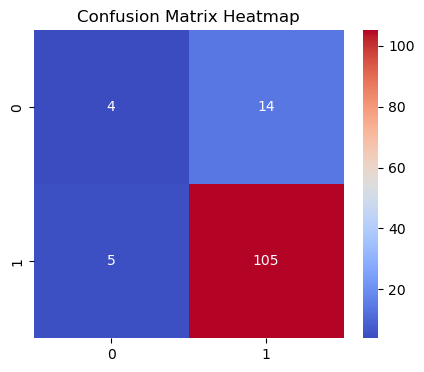

Classification report               precision    recall  f1-score   support

       False       0.44      0.22      0.30        18
        True       0.88      0.95      0.92       110

    accuracy                           0.85       128
   macro avg       0.66      0.59      0.61       128
weighted avg       0.82      0.85      0.83       128



In [389]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)

# Confusion metrix
cnf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Classification report
class_report = classification_report(y_test, y_pred_logistic)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()
print(f"Classification report {class_report}")

¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

**1. Accuracy:** 85.16%. The model correctly classified 85.16% of all instances in the test set.

**2. Confusion Matrix**
- True Positives (1s predicted as 1s): 105
- False Positives (0s predicted as 1s): 14
- False Negatives (1s predicted as 0s): 5
- True Negatives (0s predicted as 0s): 4
The model shows a significant bias toward classifying instances as class 1, with relatively few true negatives (4) and a large number of false positives (14). This imbalance suggests that the model has a tendency to overpredict the positive class (class 1).

**3.F1-score:**
- Class 0: 0.30 — This low F1-score shows that the model struggles with correctly identifying class 0 instances, balancing between low precision and recall.
- Class 1: 0.92 — The high F1-score for class 1 shows the model is highly effective at identifying positive instances with few misclassifications.

**Summary**
The model has high accuracy and performs well for the positive class (1) but performs poorly for the negative class (0). Addressing class imbalance would likely improve its ability to correctly classify the minority class, thereby improving recall and F1-score for class 0.

#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [390]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree Classifier
conversion_model_tree = DecisionTreeClassifier()

In [391]:
# Perform de fitting
conversion_model_tree.fit(X_train,y_train)

# Prediction of test set
y_pred_tree = conversion_model_tree.predict(X_test)

#Predicted values
print(f"Prediction for test set:{y_pred_tree}")

# Actual value and the predicted value
conversion_dif_tree = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_tree})
conversion_dif_tree.head()

Prediction for test set:[ True  True  True  True False False  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True False]


,Actual value,Predicted value
0,True,True
1,True,True
2,True,True
3,True,True
4,False,False


Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

Accuracy: 100.00%
Confusion matrix:


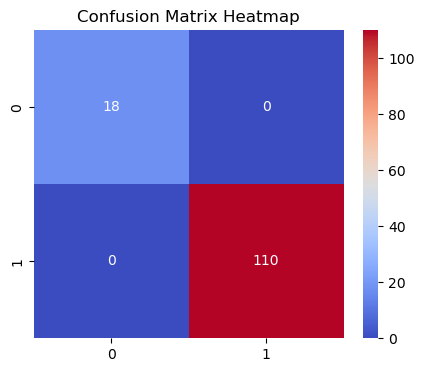

Classification report               precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00       110

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



In [392]:
# Accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Confusion metrix
cnf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Classification report
class_report_tree = classification_report(y_test, y_pred_tree)

print("Accuracy: {:.2f}%".format(accuracy_tree * 100))
print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_tree, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()
print(f"Classification report {class_report_tree}")


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [394]:
# Create the Decision Tree Classifier
conversion_model_tree5 = DecisionTreeClassifier(max_depth=5)

# Perform de fitting
conversion_model_tree5.fit(X_train,y_train)

# Prediction of test set
y_pred_tree5 = conversion_model_tree5.predict(X_test)

#Predicted values
print(f"Prediction for test set:{y_pred_tree5}")

# Actual value and the predicted value
conversion_dif_tree5 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_tree5})
conversion_dif_tree5.head()

Prediction for test set:[ True  True  True  True False False  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True]


,Actual value,Predicted value
0,True,True
1,True,True
2,True,True
3,True,True
4,False,False


Accuracy: 98.44%
Confusion matrix:


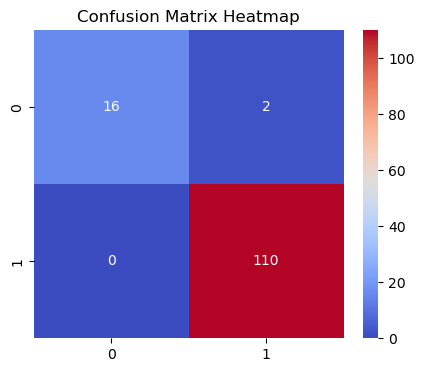

Classification report               precision    recall  f1-score   support

       False       1.00      0.89      0.94        18
        True       0.98      1.00      0.99       110

    accuracy                           0.98       128
   macro avg       0.99      0.94      0.97       128
weighted avg       0.98      0.98      0.98       128



In [395]:
# Accuracy
accuracy_tree5 = accuracy_score(y_test, y_pred_tree5)

# Confusion metrix
cnf_matrix_tree5 = confusion_matrix(y_test, y_pred_tree5)

# Classification report
class_report_tree5 = classification_report(y_test, y_pred_tree5)

print("Accuracy: {:.2f}%".format(accuracy_tree5 * 100))
print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_tree5, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()
print(f"Classification report {class_report_tree5}")

¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

**1. Accuracy:** 98,44%. The model correctly classified 98,44% of all instances in the test set.

**2. Confusion Matrix**
- True Positives (1s predicted as 1s): 110
- False Positives (0s predicted as 1s): 2
- False Negatives (1s predicted as 0s): 1
- True Negatives (0s predicted as 0s): 16
This model better predicts positives and negatives

**3.F1-score:**
- Class 0: 0.94 — The high F1-score for class 0 shows the model is highly effective
- Class 1: 0.99 — The high F1-score for class 1 shows the model is highly effective at identifying positive instances with few misclassifications.

**Summary**
The model has high accuracy and performs well for both the positive class and negative class. Even if the data suggests that the model performs well, we should make sure that the model is not overfitted.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: